In [1]:
setwd("~/Documents/Upd-Germline")
source("_targets.R")

Loading required package: viridisLite


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'glmGamPoi'


The following object is masked from 'package:dplyr':

    vars



Attaching package: 'purrr'


The following object is masked from 'package:magrittr':

    set_names


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count



Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, c

In [2]:
tar_load(
  c(
    repli.posterior_Germline_chr,
    repli.timing_Germline_chr
  )
)

In [3]:
repli.timing_Germline_chr[40000]

GRanges object with 1 range and 1 metadata column:
     seqnames            ranges strand |     score
        <Rle>         <IRanges>  <Rle> | <numeric>
  2R       2R 16485001-16486000      * | -0.138614
  -------
  seqinfo: 1870 sequences from an unspecified genome

In [4]:
prob <- repli.posterior_Germline_chr %>%
  subset(rowname == 40000) %>%
  pull(prob)
angle <- seq(0, pi/2, length.out=length(prob))
timing <- sin(angle)/(sin(angle)+cos(angle))
d_timing_d_angle <- 1/(1 + sin(2*angle))
(sum(timing * prob * d_timing_d_angle) / sum(prob * d_timing_d_angle))

[1] 0.569307

In [5]:
qlogis(timing[2])

[1] -3.852332

In [6]:
args(approx)

function (x, y = NULL, xout, method = "linear", n = 50, yleft, 
    yright, rule = 1, f = 0, ties = mean, na.rm = TRUE) 
NULL

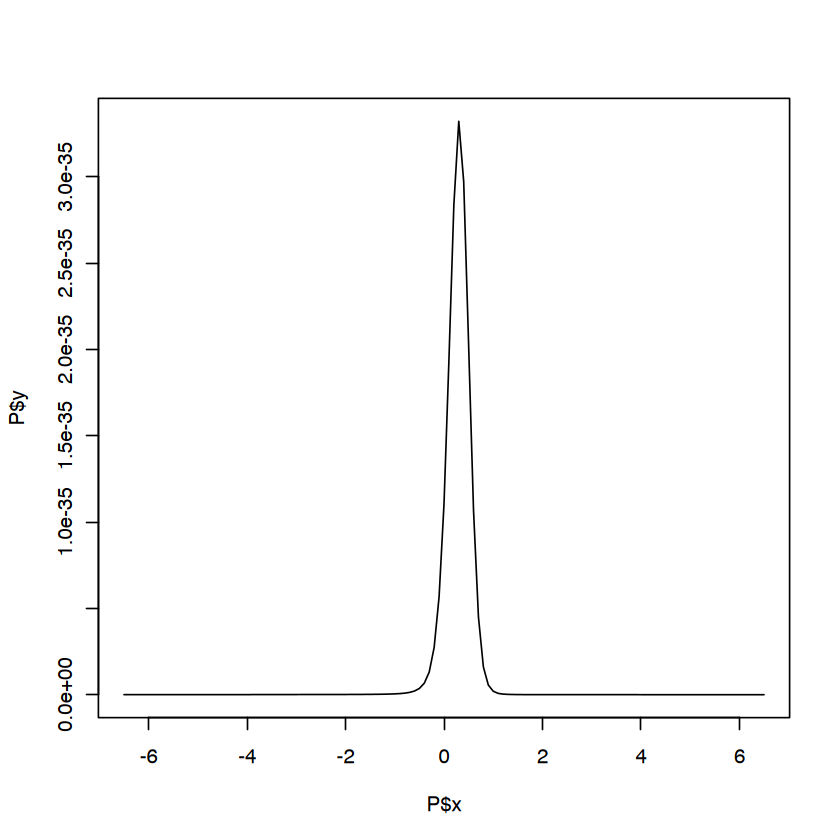

In [7]:
P <- approx(
  c(
    seq(-10, -4),
    qlogis(timing[-c(1, length(prob))]),
    seq(4, 10)
  ),
  c(
    prob[1] * dlogis(seq(-10, -4)),
    prob[-c(1, length(prob))] * dlogis(timing[-c(1, length(prob))]),
    prob[length(prob)] * dlogis(seq(4, 10))
  ),
  xout = seq(-6.5, 6.5, by=0.1)
)
plot(P, type="l")

In [8]:
plogis(sum(P$x * P$y) / sum(P$y))

[1] 0.5699525

In [9]:
sum(seqnames(repli.timing_Germline_chr) == "2L")

[1] 23514

In [17]:
post <- sapply(
  seq(2, 23514, by=50),
  \(i) {
    prob <- repli.posterior_Germline_chr$prob[repli.posterior_Germline_chr$rowname == i]
    v <- approx(
      c(
        seq(-7, -4),
        qlogis(timing[-c(1, length(prob))]),
        seq(4, 7)
      ),
      c(
        prob[1] * dlogis(seq(-7, -4)),
        prob[-c(1, length(prob))] * dlogis(timing[-c(1, length(prob))]),
        prob[length(prob)] * dlogis(seq(4, 7))
      ),
      xout = seq(-6.3, 6.3, by=0.1)
    )$y
    v / sum(v)
  }
)
dim(post)
post[1:10, 1:10]

[1] 127 471

0.0002996739,0.0001108183,0.0004160614,0.0002822739,0.0002701934,0.0002802199,0.0003092693,6.429697e-10,0.0002691490,0.0003831576
0.0003229973,0.0001194431,0.0004484431,0.0003042430,0.0002912223,0.0003020292,0.0003333394,6.930115e-10,0.0002900966,0.0004129784
0.0003463206,0.0001280680,0.0004808248,0.0003262121,0.0003122513,0.0003238385,0.0003574095,7.430532e-10,0.0003110442,0.0004427992
0.0003696440,0.0001366929,0.0005132064,0.0003481812,0.0003332802,0.0003456477,0.0003814797,7.930950e-10,0.0003319919,0.0004726200
0.0004323108,0.0001598669,0.0006002119,0.0004072095,0.0003897822,0.0004042464,0.0004461531,9.275507e-10,0.0003882754,0.0005527447
0.0004949777,0.0001830408,0.0006872173,0.0004662377,0.0004462841,0.0004628451,0.0005108265,1.062007e-09,0.0004445590,0.0006328694
0.0005576445,0.0002062148,0.0007742227,0.0005252659,0.0005027861,0.0005214438,0.0005754999,1.196462e-09,0.0005008426,0.0007129941
0.0006203114,0.0002293887,0.0008612282,0.0005842941,0.0005592881,0.0005800425,0.0006401733,1.330918e-09,0.0005571262,0.0007931187
0.0006829782,0.0002525627,0.0009482336,0.0006433223,0.0006157901,0.0006386412,0.0007048467,1.465374e-09,0.0006134098,0.0008732434
0.0007456451,0.0002757367,0.0010352390,0.0007023505,0.0006722921,0.0006972399,0.0007695201,1.599830e-09,0.0006696933,0.0009533681


In [11]:
dim(post)

[1] 127 471

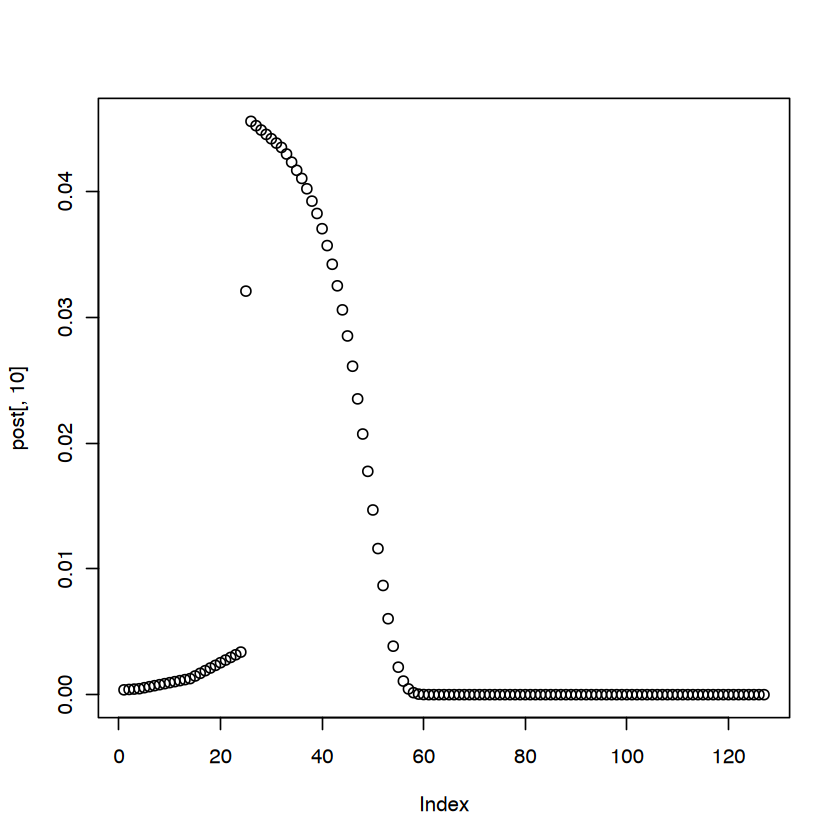

In [12]:
plot(post[, 10])

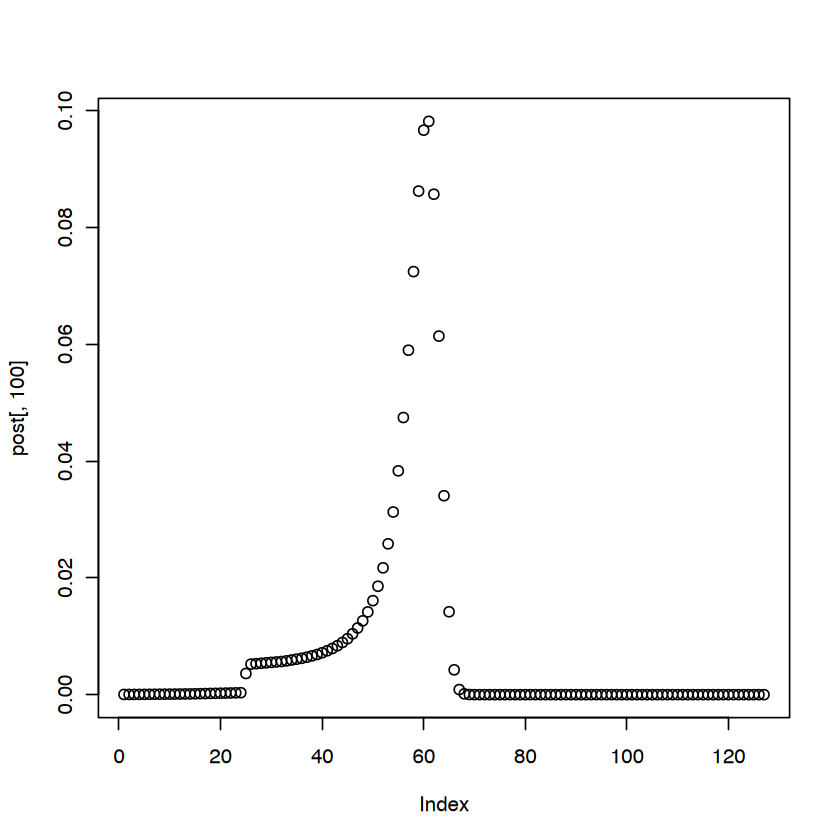

In [13]:
plot(post[, 100])

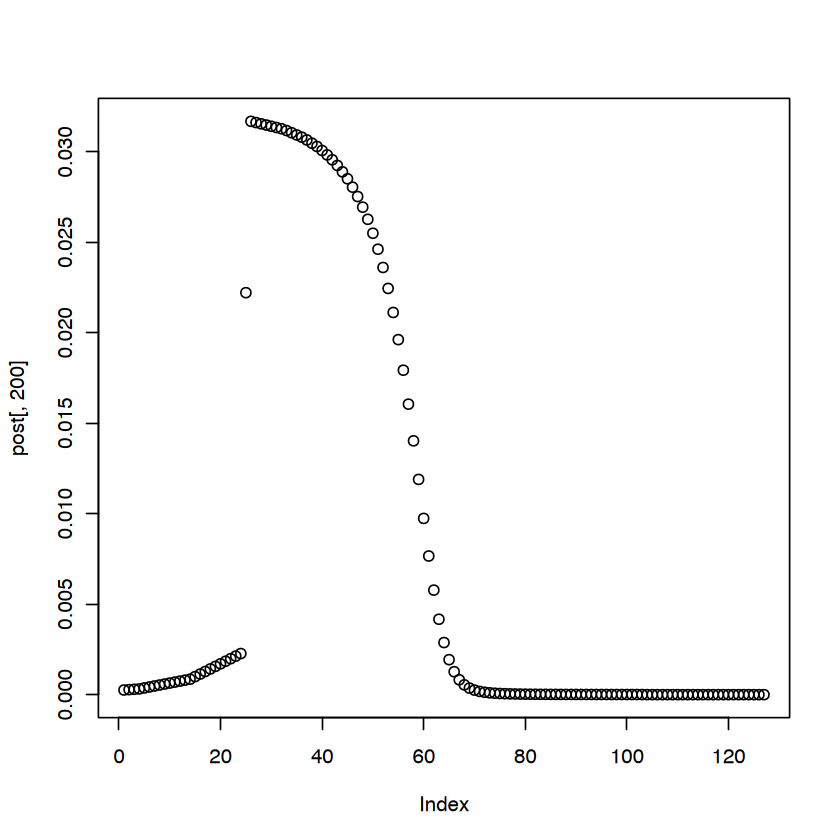

In [15]:
plot(post[, 200])

In [14]:
Y <- mvfft(rbind(post, matrix(0, nrow=129, ncol=ncol(post))))

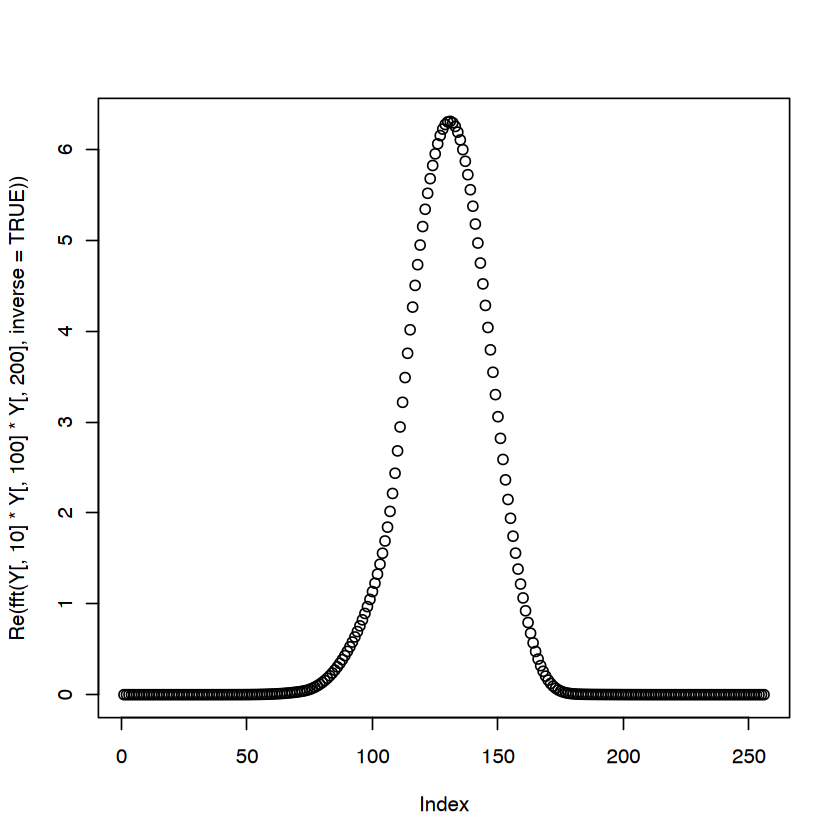

In [16]:
plot(Re(fft(Y[,10] * Y[,100] * Y[,200], inverse=TRUE)))

In [54]:
pairup_Y <- function(Y) {
  if (ncol(Y) %% 2 == 1) {
    Y <- cbind(Y, 0)
  }
  Y <- Y[, sample(ncol(Y))]
  dist_of_sums <- mvfft(
    Y[, seq(1, ncol(Y), by=2)] *
      Y[, seq(2, ncol(Y), by=2)],
    inverse=TRUE
  ) %>%
    Mod()
  dist_of_avg <- dist_of_sums[
    c(
      seq(1, nrow(Y), by=2),
      seq(nrow(Y) + 2, 2 * nrow(Y), by=2)
    ) %>%
      rep(ncol(dist_of_sums)) %>%
      head(nrow(Y) / 2 * ncol(dist_of_sums)) +
      rep(seq(ncol(dist_of_sums)), each = nrow(Y) / 2)
  ] %>%
    matrix(nrow = nrow(Y) / 2) %>%
    head(127)
  dist_of_avg <- dist_of_avg /
    rep(
      colSums(dist_of_avg) / 0.1,
      each = 127
    )
  obs2 <- rbind(dist_of_avg, matrix(0, nrow=129, ncol=ncol(dist_of_avg)))
  print(dim(obs2))
  mvfft(obs2)
}
obs2 <- pairup_Y(Y) %>% pairup_Y()

[1] 256 236
[1] 256 118


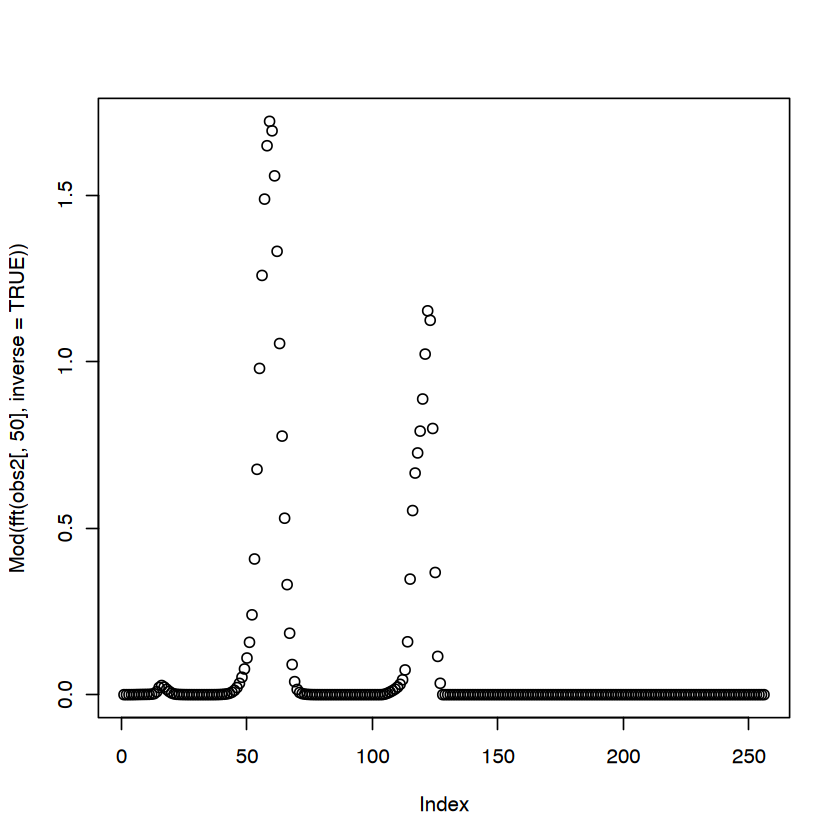

In [55]:
plot(Mod(fft(obs2[, 50], inverse=TRUE)))

In [61]:
Y2 <- Y
while (ncol(Y2) > 2) {
  Y2 <- Y2 %>% pairup_Y()
}
dim(Y2)
cor(
  Mod(fft(Y2[, 1], inverse=TRUE)),
  Mod(fft(Y2[, 2], inverse=TRUE))
)

[1] 256 236
[1] 256 118
[1] 256  59
[1] 256  30
[1] 256  15
[1] 256   8
[1] 256   4
[1] 256   2


[1] 256   2

[1] 0.8174416